In [1]:
import numpy as np
import pandas as pd
import pandahouse as ph
import seaborn as sns
from scipy import stats

In [2]:
connection = {
    'host': 'https://clickhouse.lab.karpov.courses',
    'password': 'dpo_python_2020',
    'user': 'student',
    'database': 'simulator_20220320'
}

q = """
select
    exp_group, 
    user_id,
    sum(action = 'like') as likes,
    sum(action = 'view') as views,
    likes/views as ctr
from {db}.feed_actions 
where
    toDate(time) >= '2022-03-08' and toDate(time) <= '2022-03-14'
    and exp_group in (2,3)
group by exp_group, user_id
"""

df = ph.read_clickhouse(q, connection=connection)

In [3]:
df.head()

,exp_group,user_id,likes,views,ctr
0,3,115383,11,36,0.305556
1,3,123580,15,92,0.163043
2,2,131473,26,148,0.175676
3,2,23985,12,66,0.181818
4,2,24523,17,120,0.141667


In [4]:
AAs = []
for _ in range(10000):
    AAs.append(stats.ttest_ind(df[df.exp_group == 2].ctr.sample(500, replace=True), df[df.exp_group == 3].ctr.sample(500, replace=True), equal_var=False).pvalue)

<AxesSubplot:ylabel='Count'>

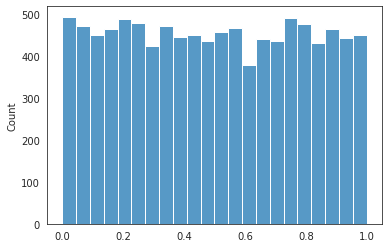

In [5]:
sns.set_style("white")
sns.histplot(AAs)

In [6]:
print(f'Процент pvalues меньше либо равных 0.05 >>> {np.round(np.mean(np.array(AAs) <= 0.05) * 100, 2)}%')

Процент pvalues меньше либо равных 0.05 >>> 5.37%


Только примерно в 5% подвыборок ключевая метрика отличается между 2 и 3 группой.<br>
(Только в 5% подвыборок pvalue менее 0.05, то есть отклоняется нулевая гипотеза о равенстве средних.)<br><br>

Это говорит о том, что между группами 2 и 3 нет статистически значимого различия по ключевой метрике, ctr.<br>
Что также можно проследить по гистограммам.

<AxesSubplot:xlabel='ctr', ylabel='Count'>

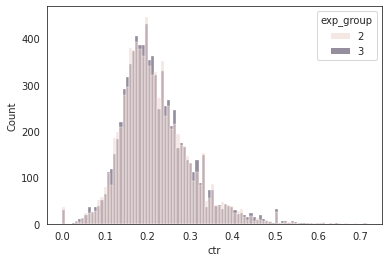

In [7]:
sns.histplot(data=df, x='ctr', hue='exp_group')